#Устранение пропусков в данных.

In [38]:
#Устранение пропусков в данных.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

In [48]:
# Будем использовать только обучающую выборку
hdata_loaded = pd.read_csv('/content/Heart.csv', sep=",")

In [49]:
hdata_loaded.shape

(303, 15)

In [50]:
hdata = hdata_loaded

In [51]:
#Удаление пропущенных значений
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('Unnamed: 0', dtype('int64')),
 ('Age', dtype('int64')),
 ('Sex', dtype('int64')),
 ('ChestPain', dtype('O')),
 ('RestBP', dtype('int64')),
 ('Chol', dtype('int64')),
 ('Fbs', dtype('int64')),
 ('RestECG', dtype('int64')),
 ('MaxHR', dtype('int64')),
 ('ExAng', dtype('int64')),
 ('Oldpeak', dtype('float64')),
 ('Slope', dtype('int64')),
 ('Ca', dtype('float64')),
 ('Thal', dtype('O')),
 ('AHD', dtype('O'))]

In [52]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['Ca', 'Thal']

In [53]:
hdata.shape

(303, 15)

In [54]:
# Количество пропусков
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Ca', 4), ('Thal', 2)]

In [55]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('Ca', 0.013201320132013201), ('Thal', 0.006600660066006601)]

In [58]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['Oldpeak']

In [59]:
# Удаление пропусков
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(303, 1)

In [60]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

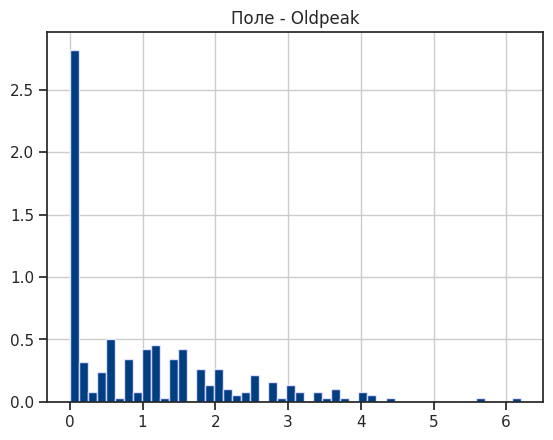

In [61]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

#Кодирование категориальных признаков

In [62]:
#第二部分Кодирование категориальных признаков
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [63]:
# Будем использовать только обучающую выборку
data_loaded = pd.read_csv('/content/Heart.csv', sep=",")

In [64]:
# размер набора данных
data_loaded.shape

(303, 15)

In [65]:
data_loaded.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [66]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Unnamed: 0', ('int64', 0)),
 ('Age', ('int64', 0)),
 ('Sex', ('int64', 0)),
 ('ChestPain', ('object', 0)),
 ('RestBP', ('int64', 0)),
 ('Chol', ('int64', 0)),
 ('Fbs', ('int64', 0)),
 ('RestECG', ('int64', 0)),
 ('MaxHR', ('int64', 0)),
 ('ExAng', ('int64', 0)),
 ('Oldpeak', ('float64', 0)),
 ('Slope', ('int64', 0)),
 ('Ca', ('float64', 4)),
 ('Thal', ('object', 2)),
 ('AHD', ('object', 0))]

In [68]:
# Используем только некоторые признаки
cols_filter = ['RestBP','RestECG', 'MaxHR','Chol']
data = data_loaded[cols_filter]
data.head()

,RestBP,RestECG,MaxHR,Chol
0,145,2,150,233
1,160,2,108,286
2,120,2,129,229
3,130,0,187,250
4,130,2,172,204


In [70]:
# Заполним пропуски
data.dropna(subset=['Chol'], inplace=True)

<ipython-input-70-813df6b8a553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Chol'], inplace=True)


In [72]:
# Заполним пропуски salary_in_usd средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'Chol', data['Chol'].mean())

<ipython-input-72-eff48e0a5579>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable].fillna(value, inplace=True)


In [73]:
# Убедимся что нет пустых значений
data.isnull().sum()

RestBP     0
RestECG    0
MaxHR      0
Chol       0
dtype: int64

#Нормализация числовых признаков

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [75]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [76]:
# Будем использовать только обучающую выборку
data = pd.read_csv('/content/Heart.csv', sep=",")

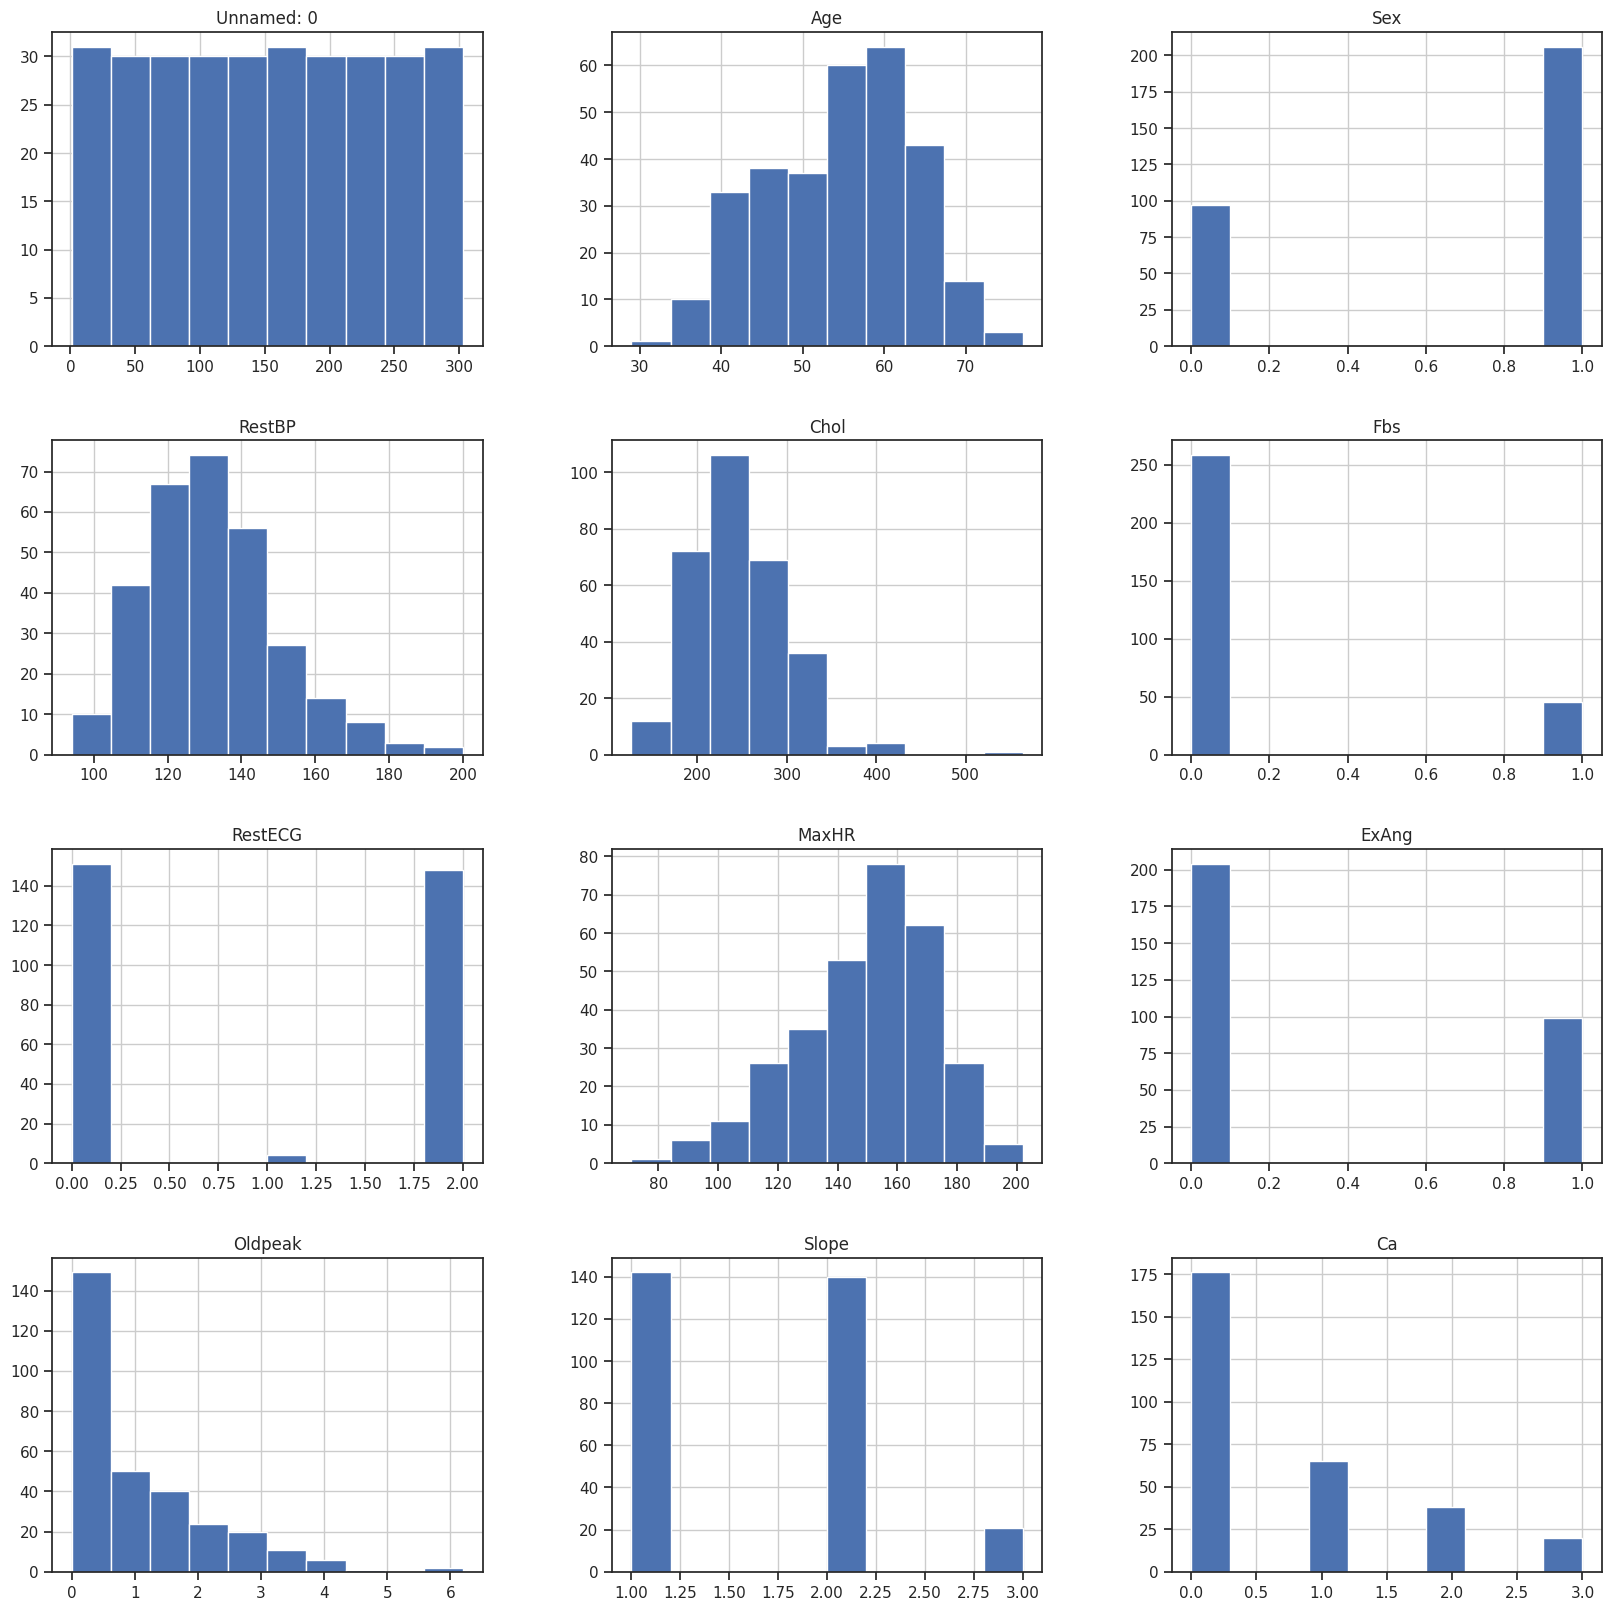

In [77]:
data.hist(figsize=(20,20))
plt.show()

Исходное распределение

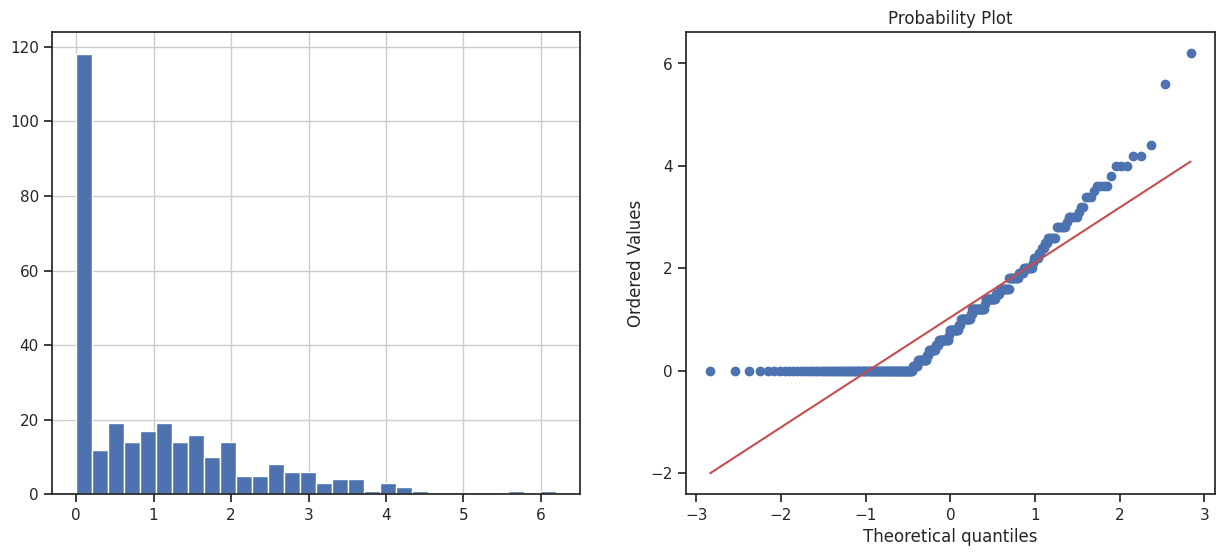

In [79]:
diagnostic_plots(data, 'Oldpeak')

Логарифмическое преобразование

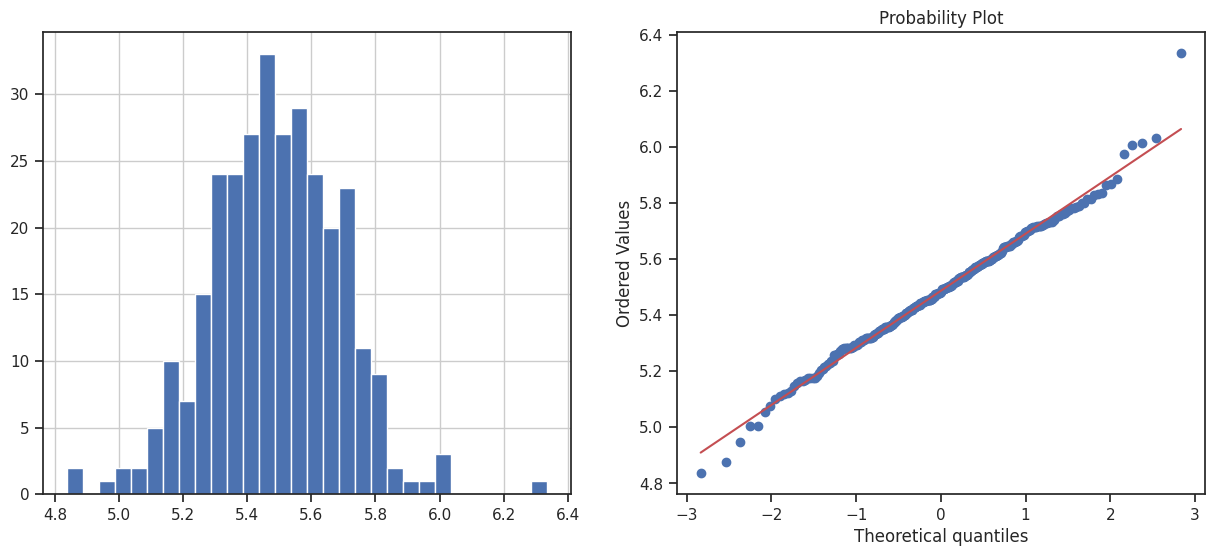

In [81]:
data['Chol'] = np.log(data['Chol'])
diagnostic_plots(data, 'Chol')

Обратное преобразование

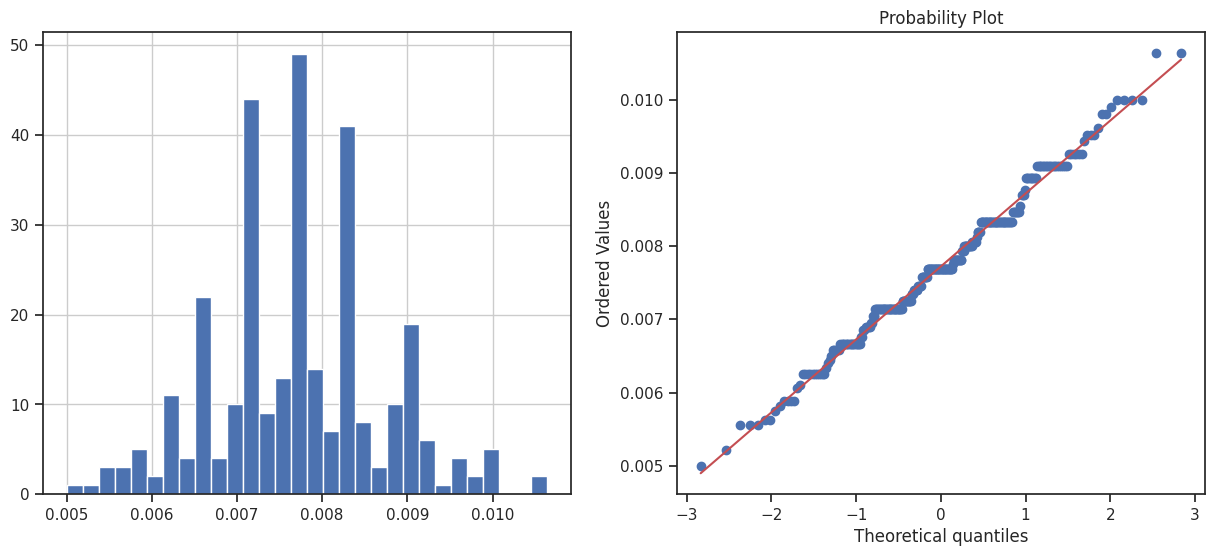

In [82]:
data['RestBP'] = 1 / (data['RestBP'])
diagnostic_plots(data, 'RestBP')

Квадратный корень

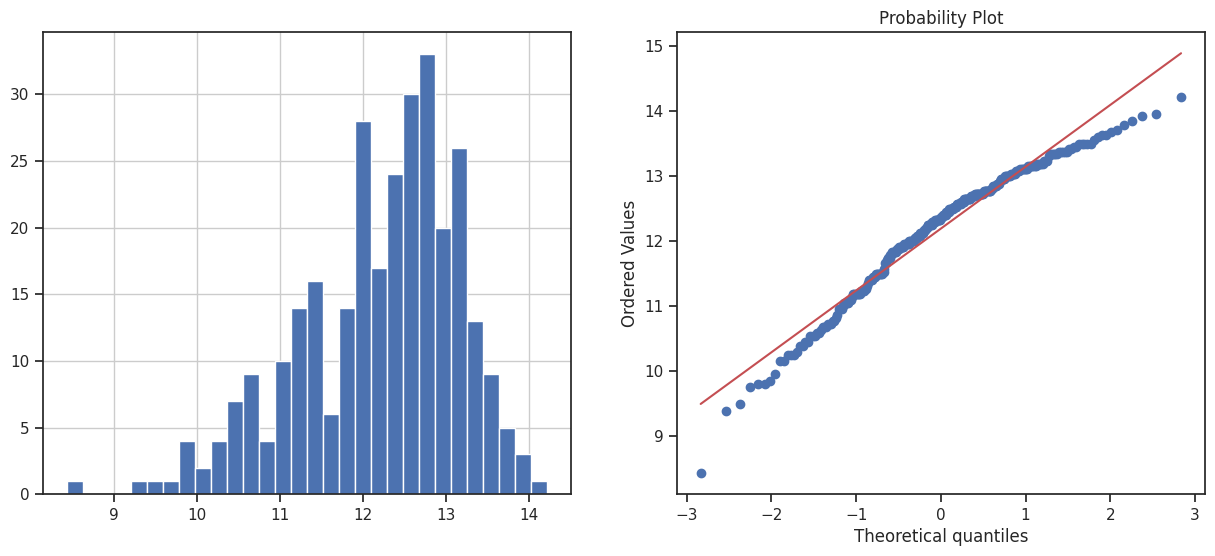

In [83]:
data['MaxHR'] = data['MaxHR']**(1/2)
diagnostic_plots(data, 'MaxHR')

Возведение в степень

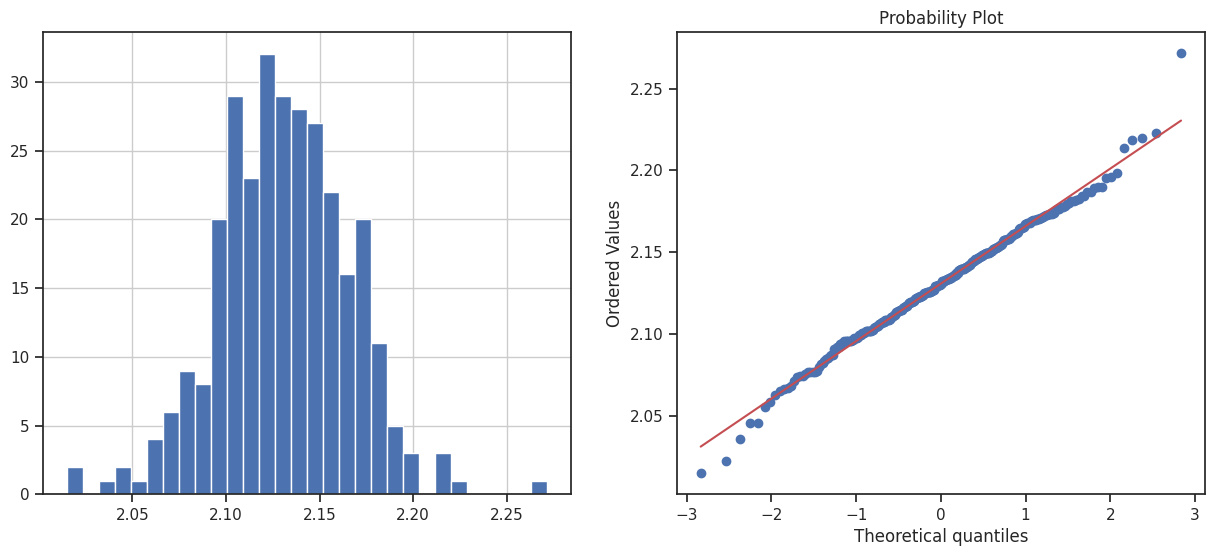

In [86]:
data['MaxHR_exp1'] = data['MaxHR']**(1/1.5)
diagnostic_plots(data, 'MaxHR_exp1')

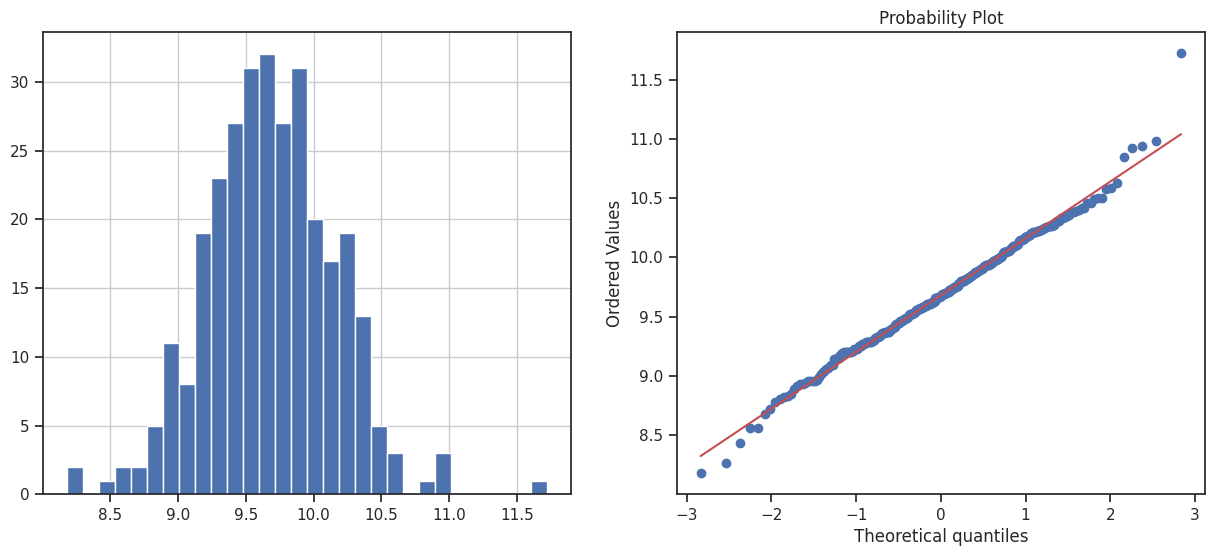

In [87]:
data['MaxHR_exp2'] = data['MaxHR']**(2)
diagnostic_plots(data, 'MaxHR_exp2')

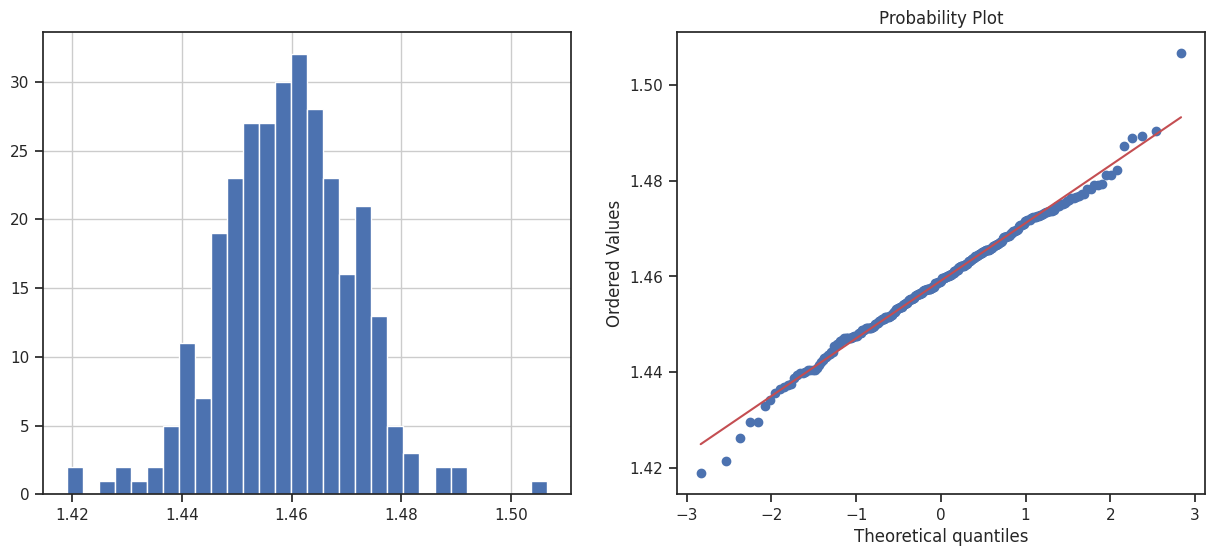

In [88]:
data['MaxHR_exp3'] = data['MaxHR']**(0.333)
diagnostic_plots(data, 'MaxHR_exp3')

Преобразование Бокса-Кокса

Оптимальное значение λ = 0.8180366066798718


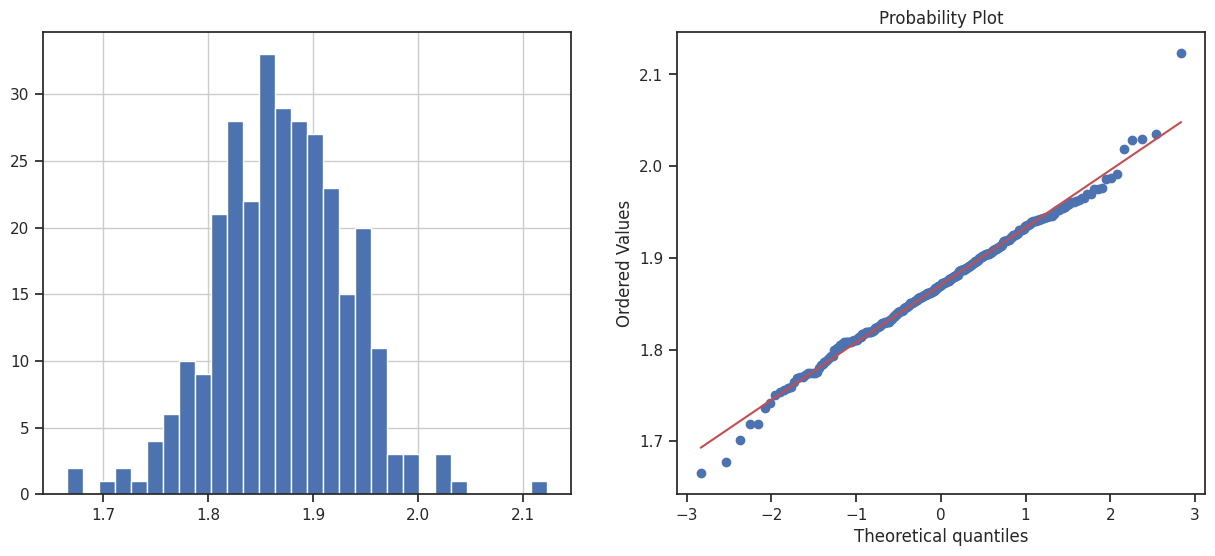

In [89]:
data['MaxHR_boxcox'], param = stats.boxcox(data['MaxHR'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'MaxHR_boxcox')

Преобразование Йео-Джонсона

Оптимальное значение λ = 0.7373660842633347


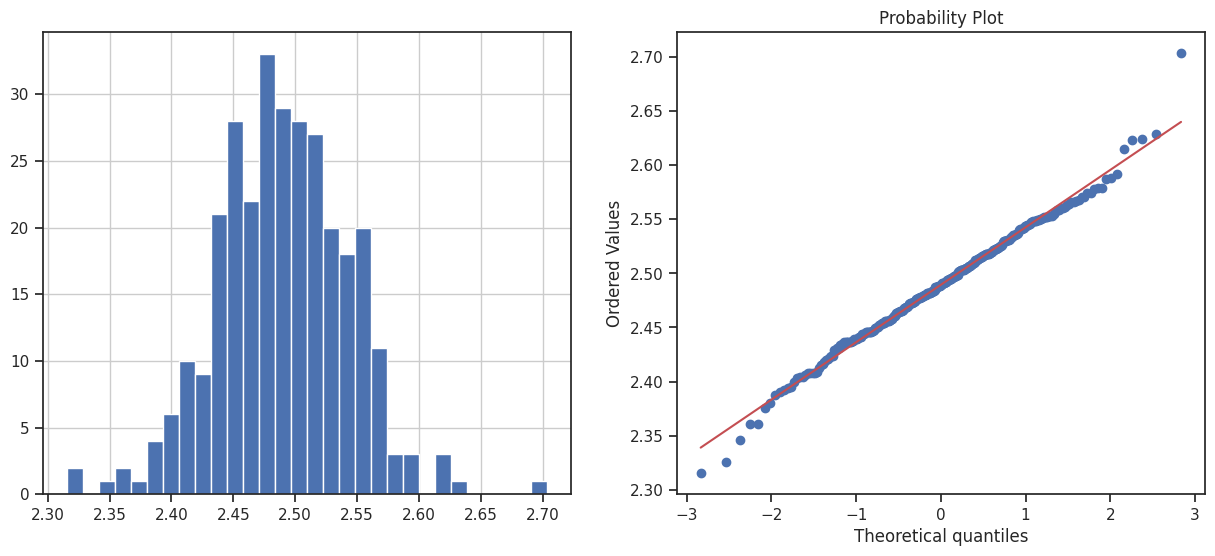

In [90]:
# Необходимо преобразовать данные к действительному типу
data['MaxHR'] = data['MaxHR'].astype('float')
data['MaxHR_yeojohnson'], param = stats.yeojohnson(data['MaxHR'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'MaxHR_yeojohnson')